## Import libraries and notebook setup

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Notebook styling
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Define a custom formatting function to add commas to large numbers
def format_with_commas(x):
    if abs(x) >= 1e6:
        return '{:,.0f}'.format(x)
    else:
        return '{:.2f}'.format(x)

# Set the display option to use the custom formatting function
pd.options.display.float_format = format_with_commas

# Open CS file
df = pd.read_csv('health.csv')

In [3]:
# from IPython.display import display, HTML

# display(HTML(df.to_html(index=False)))

df

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0,50,"3,093,457",Male,Bachelor's Degree,4.97,16.63,200.42,70.92,150.40,125.57,Excellent
1,1,44,"5,545,445",Male,Bachelor's Degree,5.83,13.26,201.01,70.67,149.29,125.60,Fair
2,2,25,"4,401,808",Male,Master's Degree,5.59,11.14,200.11,67.46,150.02,127.09,Excellent
3,3,41,"4,606,865",Female,High School,6.27,9.14,199.65,67.57,150.36,117.39,Poor
4,4,24,"6,956,049",Male,Bachelor's Degree,5.90,9.78,199.33,79.60,149.73,114.16,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,22,"2,072,546",Male,Master's Degree,5.36,14.43,200.70,49.57,150.11,113.66,Fair
1996,1996,25,"7,456,909",Female,Master's Degree,5.50,5.35,198.99,73.59,149.83,107.86,Excellent
1997,1997,44,"5,560,391",Male,PhD,7.03,3.75,200.58,44.49,150.59,138.21,Poor
1998,1998,20,"3,436,759",Male,Bachelor's Degree,5.69,5.72,200.21,85.26,150.83,127.52,Good


### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

In [4]:
df.describe()

,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,999.50,39.42,"4,889,928",5.36,9.95,200.22,70.23,150.73,119.68
std,577.49,11.56,"2,010,795",0.92,4.91,0.97,10.17,0.68,11.20
min,0.00,20.00,"-1,088,987",2.53,-4.50,196.91,32.58,149.12,0.00
25%,499.75,30.00,"3,580,714",4.74,6.65,199.58,63.65,150.24,113.05
50%,999.50,39.00,"4,898,901",5.35,9.93,200.22,70.39,150.66,119.94
75%,1499.25,49.25,"6,271,595",6.00,13.23,200.87,76.89,151.14,126.61
max,1999.00,59.00,"12,227,492",8.58,26.82,203.16,109.61,153.87,200.95


### 2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

In [4]:
def clip_column(df, column, lower_percentile=0.05, upper_percentile=0.95):
    new_df = df.copy()
    
    # Get lower and upper bounds of column
    lower_bound = new_df[column].quantile(lower_percentile)
    upper_bound = new_df[column].quantile(upper_percentile)
    
    # Clip column
    new_df[column] = np.clip(df[column], lower_bound, upper_bound)
    
    return new_df

# Clip columns
new_df = clip_column(df, 'Age')
new_df = clip_column(new_df, 'Income')
new_df = clip_column(new_df, 'Stress_Level')
new_df = clip_column(new_df, 'Exercise_Hours_Per_Week')
new_df = clip_column(new_df, 'Cholesterol_Level')
new_df = clip_column(new_df, 'Weight')
new_df = clip_column(new_df, 'Height')
new_df = clip_column(new_df, 'Blood_Pressure')

new_df.describe()

,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,999.50,39.38,"4,884,740",5.36,9.92,200.23,70.24,150.72,119.85
std,577.49,11.39,"1,836,148",0.84,4.45,0.89,9.21,0.61,9.18
min,0.00,21.00,"1,492,371",3.82,1.92,198.60,53.28,149.77,103.26
25%,499.75,30.00,"3,580,714",4.74,6.65,199.58,63.65,150.24,113.05
50%,999.50,39.00,"4,898,901",5.35,9.93,200.22,70.39,150.66,119.94
75%,1499.25,49.25,"6,271,595",6.00,13.23,200.87,76.89,151.14,126.61
max,1999.00,57.00,"8,140,684",6.85,17.91,201.84,86.56,151.97,136.49


### 3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

In [47]:
def plot_histogram(df, column, bins=15, color='darkviolet', edgecolor='black'):
    df[column].plot(kind='hist', bins=bins, color=color, edgecolor=edgecolor, linewidth=1.2)
    plt.title(f'{column} Histogram Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
def plot_box(df, column, color='darkviolet'):
    df[column].plot(kind='box', vert=False, figsize=(16,2), color='darkviolet')
    plt.title(f'{column} Box Plot Distribution')
    plt.ylabel(column)

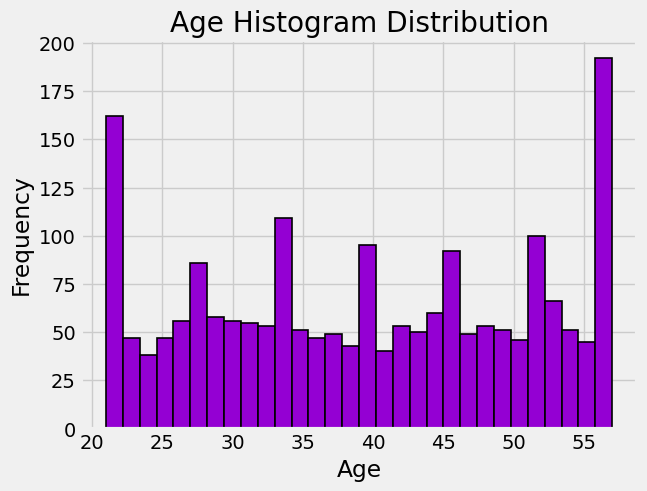

In [82]:
plot_histogram(new_df, 'Age', bins=30)

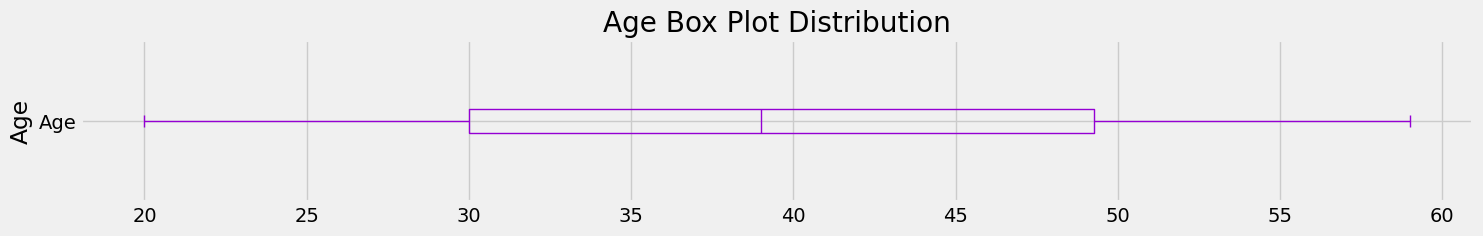

In [49]:
plot_box(df, 'Age')

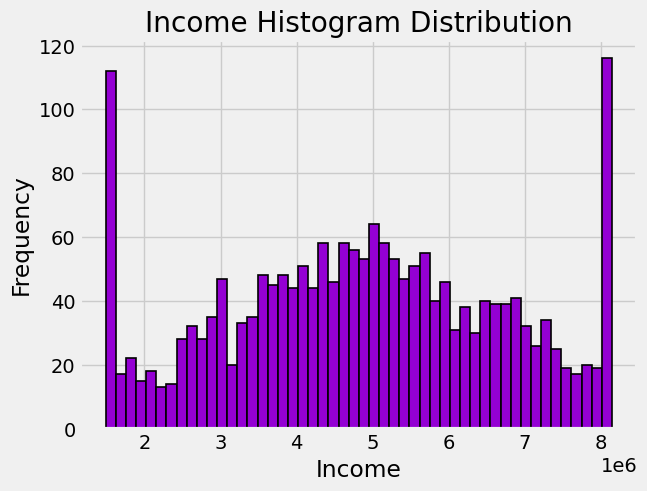

In [83]:
plot_histogram(new_df, 'Income',bins=50)

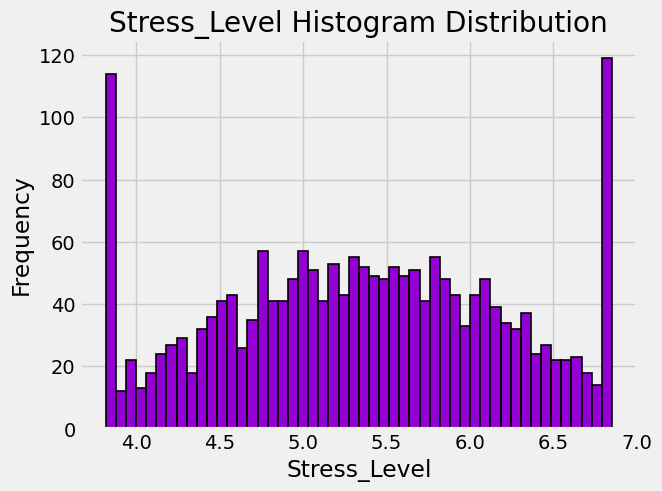

In [84]:
plot_histogram(new_df, 'Stress_Level', bins=50)

### 4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?